In [42]:
import zipfile36 as zipfile
import pandas as pd
import calendar
import matplotlib.pyplot as plt
from datetime import date

## 7. Relationships' investigation between price and calendar features



### 7.1 Import of the dataset

In [31]:
zf = zipfile.ZipFile('berlin-airbnb-data.zip')
dfPricesDates = pd.read_csv(zf.open('calendar_summary.csv'))
dfPricesDates.head()

,listing_id,date,available,price
0,2015,2019-09-10,f,NaN
1,2015,2019-09-09,f,NaN
2,2015,2019-09-08,f,NaN
3,2015,2019-09-07,f,NaN
4,2015,2019-09-06,f,NaN


### 7.2 Columns exploration

Once the dataset is imported, it is needed to explore its columns to check whether
some data preprocessing technique should be applied.

The first step concerns the removal of the null data-points.

In [32]:
dfPricesDates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8231480 entries, 0 to 8231479
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
 2   available   object
 3   price       object
dtypes: int64(1), object(3)
memory usage: 251.2+ MB


In [33]:
print('Number of null rows:', dfPricesDates['price'].isnull().sum())

Number of null rows: 6430639


In [34]:
dfPricesDates.dropna(axis=0, how='any', inplace=True)
dfPricesDates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800841 entries, 128 to 8231474
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
 2   available   object
 3   price       object
dtypes: int64(1), object(3)
memory usage: 68.7+ MB


Since the 'available' column only contains a single value, it can be dropped.

In [35]:
dfPricesDates['available'].unique()

array(['t'], dtype=object)

In [36]:
dfPricesDates.drop(columns=['available'], inplace=True)
dfPricesDates.head()

,listing_id,date,price
128,2015,2019-05-05,$76.00
129,2015,2019-05-04,$76.00
130,2015,2019-05-03,$76.00
131,2015,2019-05-02,$76.00
132,2015,2019-05-01,$78.00


In order to deal with the 'price' column, its values need to be converted into numeric.

In [37]:
type(dfPricesDates['price'].iloc[0])

str

In [38]:
dfPricesDates['price'] = dfPricesDates['price'].apply(
    lambda x: x.replace(',', ''))

dfPricesDates['price'] = dfPricesDates['price'].apply(
    lambda x: float(x[1:]))

dfPricesDates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800841 entries, 128 to 8231474
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   listing_id  int64  
 1   date        object 
 2   price       float64
dtypes: float64(1), int64(1), object(1)
memory usage: 55.0+ MB


Finally, also the type of the 'date' column is converted into datetime.

In [39]:
dfPricesDates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800841 entries, 128 to 8231474
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   listing_id  int64  
 1   date        object 
 2   price       float64
dtypes: float64(1), int64(1), object(1)
memory usage: 55.0+ MB


In [40]:
dfPricesDates['date'] = pd.to_datetime(dfPricesDates['date'])
dfPricesDates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800841 entries, 128 to 8231474
Data columns (total 3 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   price       float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 55.0 MB


In [113]:
dfPricesDates.head()

,listing_id,date,price,weekday,season,holidays
128,2015,2019-05-05,76.0,Sunday,spring,0
129,2015,2019-05-04,76.0,Saturday,spring,0
130,2015,2019-05-03,76.0,Friday,spring,0
131,2015,2019-05-02,76.0,Thursday,spring,0
132,2015,2019-05-01,78.0,Wednesday,spring,1


### 7.3 Price vs Day of the week

In [41]:
dfPricesDates['weekday'] = dfPricesDates.apply(
    lambda x: calendar.day_name[x['date'].weekday()], axis=1)

dfPricesDates.head()

,listing_id,date,price,weekday
128,2015,2019-05-05,76.0,Sunday
129,2015,2019-05-04,76.0,Saturday
130,2015,2019-05-03,76.0,Friday
131,2015,2019-05-02,76.0,Thursday
132,2015,2019-05-01,78.0,Wednesday


<BarContainer object of 7 artists>

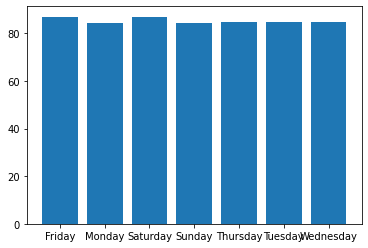

In [49]:
weekdayMeans = dfPricesDates.groupby('weekday').price.mean()
plt.bar(weekdayMeans.index, weekdayMeans)

In [56]:
listingWeekdayMeans = dfPricesDates.groupby(['listing_id', 'weekday']).price.mean()
listingWeekdayMeans.head()

listing_id  weekday 
2015        Friday      82.050000
            Monday      81.900000
            Saturday    82.100000
            Sunday      81.714286
            Thursday    81.750000
Name: price, dtype: float64

In [70]:
dfListingWeekdayMeans = listingWeekdayMeans.unstack(level=1)
dfListingWeekdayMeans.head()

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
listing_id,,,,,,,
2015,82.05,81.9,82.1,81.714286,81.75,81.9,81.9
3176,90.00,90.0,90.0,90.000000,90.00,90.0,90.0
3309,30.00,26.0,30.0,26.000000,26.00,26.0,26.0
7071,44.50,44.4,44.0,44.250000,44.50,44.4,44.5
9991,180.00,180.0,180.0,180.000000,180.00,180.0,180.0


In [77]:
dfListingWeekdayMeans.corr(method='kendall')

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
weekday,,,,,,,
Friday,1.000000,0.940464,0.988121,0.946481,0.947083,0.940855,0.943441
Monday,0.940464,1.000000,0.941439,0.978557,0.972232,0.985404,0.977170
Saturday,0.988121,0.941439,1.000000,0.951268,0.942558,0.940675,0.941255
Sunday,0.946481,0.978557,0.951268,1.000000,0.973341,0.974599,0.972011
Thursday,0.947083,0.972232,0.942558,0.973341,1.000000,0.975663,0.983496
Tuesday,0.940855,0.985404,0.940675,0.974599,0.975663,1.000000,0.984663
Wednesday,0.943441,0.977170,0.941255,0.972011,0.983496,0.984663,1.000000


The correlation matrix shows that all the features are very highly correlated.
So, it is possible to state that there are, meanly, very slight differences between
the prices of the listings in the different days of the week.

### 7.4 Price vs Season

In [84]:
defaultYear = 2000
seasons = [('winter', (date(defaultYear,  1,  1),  date(defaultYear,  3, 20))),
           ('spring', (date(defaultYear,  3, 21),  date(defaultYear,  6, 20))),
           ('summer', (date(defaultYear,  6, 21),  date(defaultYear,  9, 22))),
           ('autumn', (date(defaultYear,  9, 23),  date(defaultYear, 12, 20))),
           ('winter', (date(defaultYear, 12, 21),  date(defaultYear, 12, 31)))]

def get_season(curr_date):
    curr_date = curr_date.replace(year=defaultYear)
    return next(season for season, (start, end) in seasons
                if start <= curr_date <= end)

In [85]:
dfPricesDates['season'] = dfPricesDates['date'].apply(
    lambda x: get_season(x))

dfPricesDates.head()

,listing_id,date,price,weekday,season
128,2015,2019-05-05,76.0,Sunday,spring
129,2015,2019-05-04,76.0,Saturday,spring
130,2015,2019-05-03,76.0,Friday,spring
131,2015,2019-05-02,76.0,Thursday,spring
132,2015,2019-05-01,78.0,Wednesday,spring


<BarContainer object of 4 artists>

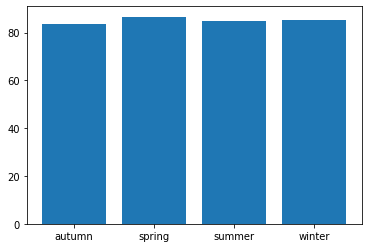

In [86]:
seasonMeans = dfPricesDates.groupby('season').price.mean()
plt.bar(seasonMeans.index, seasonMeans)

In [87]:
listingSeasonMeans = dfPricesDates.groupby(['listing_id', 'season']).price.mean()
listingSeasonMeans.head()

listing_id  season
2015        autumn    76.000000
            spring    76.891304
            winter    84.788889
3176        autumn    90.000000
            spring    90.000000
Name: price, dtype: float64

In [88]:
dfListingSeasonMeans = listingSeasonMeans.unstack(level=1)
dfListingSeasonMeans.head()

season,autumn,spring,summer,winter
listing_id,,,,
2015,76.000000,76.891304,NaN,84.788889
3176,90.000000,90.000000,90.000000,NaN
3309,27.066667,27.130435,27.191489,27.090909
7071,44.384615,NaN,NaN,NaN
9991,180.000000,NaN,180.000000,180.000000


Some listings show NaN values when the mean of the price for a season is considered.
This may be caused by the unavailability of the listing during that considered period.
So, these listings are not considered in the correlation analysis.

In [90]:
dfListingSeasonMeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11764 entries, 2015 to 29867352
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   autumn  10244 non-null  float64
 1   spring  6603 non-null   float64
 2   summer  5172 non-null   float64
 3   winter  9896 non-null   float64
dtypes: float64(4)
memory usage: 459.5 KB


In [91]:
dfListingSeasonNonNullMeans = dfListingSeasonMeans.dropna(axis=0, how='any')
dfListingSeasonNonNullMeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4364 entries, 3309 to 29856708
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   autumn  4364 non-null   float64
 1   spring  4364 non-null   float64
 2   summer  4364 non-null   float64
 3   winter  4364 non-null   float64
dtypes: float64(4)
memory usage: 170.5 KB


In [92]:
dfListingSeasonNonNullMeans.corr(method='kendall')

season,autumn,spring,summer,winter
season,,,,
autumn,1.000000,0.947105,0.946358,0.907222
spring,0.947105,1.000000,0.964082,0.917361
summer,0.946358,0.964082,1.000000,0.892573
winter,0.907222,0.917361,0.892573,1.000000


Even in this case, the correlation matrix shows that all the features are very highly
correlated.
So, it is possible to state that there are, meanly, very slight differences between
the prices of the listings in the different seasons.

### 7.5 Price vs Holiday

In order to check whether a certain date is considered as holiday, the holidays
library is used.

In [102]:
import holidays

germanHolidays = holidays.Germany()

In [115]:
dfPricesDates['holidays'] = dfPricesDates.apply(
    lambda x: int(x['date'] in germanHolidays or x['weekday'] == 'Sunday'), axis=1)

dfPricesDates.head()

,listing_id,date,price,weekday,season,holidays
128,2015,2019-05-05,76.0,Sunday,spring,1
129,2015,2019-05-04,76.0,Saturday,spring,0
130,2015,2019-05-03,76.0,Friday,spring,0
131,2015,2019-05-02,76.0,Thursday,spring,0
132,2015,2019-05-01,78.0,Wednesday,spring,1


<BarContainer object of 2 artists>

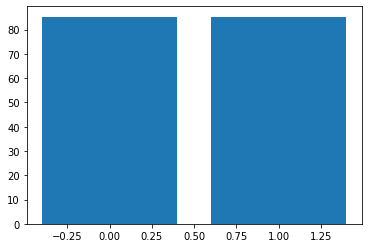

In [116]:
holidaysMeans = dfPricesDates.groupby('holidays').price.mean()
plt.bar(holidaysMeans.index, holidaysMeans)

In [117]:
listingHolidaysMeans = dfPricesDates.groupby(['listing_id', 'holidays']).price.mean()
listingHolidaysMeans.head()

listing_id  holidays
2015        0           81.210526
            1           84.814815
3176        0           90.000000
            1           90.000000
3309        0           27.333333
Name: price, dtype: float64

In [118]:
dfListingHolidaysMeans = listingHolidaysMeans.unstack(level=1)
dfListingHolidaysMeans.head()

holidays,0,1
listing_id,,
2015,81.210526,84.814815
3176,90.000000,90.000000
3309,27.333333,26.083333
7071,44.409091,44.250000
9991,180.000000,180.000000


Some listings show NaN values when the mean of the price for a season is considered.
This may be caused by the unavailability of the listing during that considered period.
So, these listings are not initially considered in the correlation analysis.

In [119]:
dfListingHolidaysMeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11764 entries, 2015 to 29867352
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       11722 non-null  float64
 1   1       11376 non-null  float64
dtypes: float64(2)
memory usage: 275.7 KB


In [120]:
dfListingHolidaysNonNullMeans = dfListingHolidaysMeans.dropna(axis=0, how='any')
dfListingHolidaysNonNullMeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11334 entries, 2015 to 29867352
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       11334 non-null  float64
 1   1       11334 non-null  float64
dtypes: float64(2)
memory usage: 265.6 KB


In [121]:
dfListingHolidaysNonNullMeans.corr(method='kendall')

holidays,0,1
holidays,,
0,1.000000,0.961755
1,0.961755,1.000000


Even in this case, the correlation matrix shows that all the features are very highly
correlated.
So, it is possible to state that there are, meanly, very slight differences between
the prices of the listings in the different days of the week.

## 8. Relationships' investigation between price and rooms' characteristics

Join listing.csv and listing_summary.csv, compute sentiment on space, description
and neighbourhood overall, take into account the room type, run PCA to check
whether some of these features are highly correlated and then build a model
(linear regression, ARIMA/SARIMA, decision tree) to try to make forecasting

It is also possible to try to perform a bucketization on the price values and then
train a decision tree model that tries to make predictions.

### 8.1 Import of the datasets

In [312]:
dfListingsSummary = pd.read_csv(zf.open('listings_summary.csv'))
dfListingsSummary.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


### 8.2 Columns exploration

In [313]:
dfListingsSummary.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

Firstly, the columns concerning the room characteristics and the prices are selected.

In [314]:
dfPricesListingTypes = dfListingsSummary[['id', 'room_type', 'accommodates',
                                          'bathrooms', 'bedrooms', 'beds', 'bed_type',
                                          'amenities', 'square_feet', 'price',
                                          'weekly_price', 'monthly_price',
                                          'security_deposit', 'cleaning_fee']]

dfPricesListingTypes.head()

,id,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,2015,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00
1,2695,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00
2,3176,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$520.00,"$1,900.00",$200.00,$50.00
3,3309,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,$26.00,$175.00,$599.00,$250.00,$30.00
4,7071,Private room,2,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",NaN,$42.00,NaN,NaN,$0.00,$0.00


In [315]:
dfPricesListingTypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                22552 non-null  int64  
 1   room_type         22552 non-null  object 
 2   accommodates      22552 non-null  int64  
 3   bathrooms         22520 non-null  float64
 4   bedrooms          22534 non-null  float64
 5   beds              22512 non-null  float64
 6   bed_type          22552 non-null  object 
 7   amenities         22552 non-null  object 
 8   square_feet       446 non-null    float64
 9   price             22552 non-null  object 
 10  weekly_price      3681 non-null   object 
 11  monthly_price     2659 non-null   object 
 12  security_deposit  13191 non-null  object 
 13  cleaning_fee      15406 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 2.4+ MB


Looking at the null data-points, the columns 'square_feet', 'weekly_price',
'monthly_price', 'security_deposit' and 'cleaning_fee' can be dropped.

In [316]:
dfPricesListingTypes = dfPricesListingTypes.drop(
    columns=['square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
             'cleaning_fee'])

dfPricesListingTypes.head()

,id,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price
0,2015,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$60.00
1,2695,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$17.00
2,3176,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",$90.00
3,3309,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",$26.00
4,7071,Private room,2,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",$42.00


Since it is not needed in order to make predictions, the column 'id' is dropped.

In [317]:
dfPricesListingTypes = dfPricesListingTypes.drop(columns=['id'])
dfPricesListingTypes.head()

,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price
0,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$60.00
1,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$17.00
2,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",$90.00
3,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",$26.00
4,Private room,2,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",$42.00


The columns 'price' must be converted into numeric.

In [318]:
dfPricesListingTypes['price'] = dfPricesListingTypes['price'].apply(
    lambda x: x.replace(',', ''))

dfPricesListingTypes['price'] = dfPricesListingTypes['price'].apply(
    lambda x: float(x[1:]))

dfPricesListingTypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   room_type     22552 non-null  object 
 1   accommodates  22552 non-null  int64  
 2   bathrooms     22520 non-null  float64
 3   bedrooms      22534 non-null  float64
 4   beds          22512 non-null  float64
 5   bed_type      22552 non-null  object 
 6   amenities     22552 non-null  object 
 7   price         22552 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


Instead of directly dealing with the column 'amenities', it can be replaced
by the number of amenities each listing contains.

In [319]:
dfPricesListingTypes['amenities'].unique()

array(['{TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Family/kid friendly","Smoke detector",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private living room",Bathtub,"Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Stove,"Luggage dropoff allowed","Long term stays allowed"}',
       '{Wifi,Kitchen,Elevator,Heating,Washer,Essentials,Shampoo,"Hair dryer","Laptop friendly workspace","Private living room"}',
       '{Internet,Wifi,Kitchen,"Buzzer/wireless intercom",Heating,"Family/kid friendly",Washer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace"}',
       ...,
       '{Wifi,Kitchen,Heating,Washer,"Fire extinguisher",Essentials,Iron,"Hot water"}',
       '{Wifi,"Paid parking off premises",Doorman,Elevator,Heating,

In [320]:
dfPricesListingTypes['amenities_nr'] = dfPricesListingTypes.apply(
    lambda x: len(x['amenities'].split(',')) + 1, axis=1)

dfPricesListingTypes = dfPricesListingTypes.drop(columns=['amenities'])

dfPricesListingTypes.head()

,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,amenities_nr
0,Entire home/apt,3,1.0,1.0,2.0,Real Bed,60.0,30
1,Private room,2,1.0,1.0,1.0,Real Bed,17.0,11
2,Entire home/apt,4,1.0,1.0,2.0,Real Bed,90.0,20
3,Private room,2,1.0,1.0,1.0,Pull-out Sofa,26.0,30
4,Private room,2,1.0,1.0,2.0,Real Bed,42.0,14


In order to deal with the column 'room_type', the corresponding dummies are generated
and inserted into the dataframe.

In [321]:
dummiesRoomType = pd.get_dummies(dfPricesListingTypes['room_type'])
dummiesRoomType.head()

,Entire home/apt,Private room,Shared room
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0


In [322]:
dfPricesListingTypes = dfPricesListingTypes.drop(columns=['room_type'])
dfPricesListingTypes = pd.concat([dfPricesListingTypes, dummiesRoomType], axis=1)
dfPricesListingTypes.head()

,accommodates,bathrooms,bedrooms,beds,bed_type,price,amenities_nr,Entire home/apt,Private room,Shared room
0,3,1.0,1.0,2.0,Real Bed,60.0,30,1,0,0
1,2,1.0,1.0,1.0,Real Bed,17.0,11,0,1,0
2,4,1.0,1.0,2.0,Real Bed,90.0,20,1,0,0
3,2,1.0,1.0,1.0,Pull-out Sofa,26.0,30,0,1,0
4,2,1.0,1.0,2.0,Real Bed,42.0,14,0,1,0


In order to deal with the column 'bed_type', the corresponding dummies are generated
and inserted into the dataframe.

In [323]:
dummiesBedType = pd.get_dummies(dfPricesListingTypes['bed_type'])
dummiesBedType.head()

,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,0,1


In [324]:
dfPricesListingTypes = dfPricesListingTypes.drop(columns=['bed_type'])
dfPricesListingTypes = pd.concat([dfPricesListingTypes, dummiesBedType], axis=1)
dfPricesListingTypes.head()

,accommodates,bathrooms,bedrooms,beds,price,amenities_nr,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,3,1.0,1.0,2.0,60.0,30,1,0,0,0,0,0,0,1
1,2,1.0,1.0,1.0,17.0,11,0,1,0,0,0,0,0,1
2,4,1.0,1.0,2.0,90.0,20,1,0,0,0,0,0,0,1
3,2,1.0,1.0,1.0,26.0,30,0,1,0,0,0,0,1,0
4,2,1.0,1.0,2.0,42.0,14,0,1,0,0,0,0,0,1


Finally, the data-points containing null points must be removed.

In [325]:
dfPricesListingTypes.dropna(axis=0, how='any', inplace=True)
dfPricesListingTypes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22472 entries, 0 to 22551
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   accommodates     22472 non-null  int64  
 1   bathrooms        22472 non-null  float64
 2   bedrooms         22472 non-null  float64
 3   beds             22472 non-null  float64
 4   price            22472 non-null  float64
 5   amenities_nr     22472 non-null  int64  
 6   Entire home/apt  22472 non-null  uint8  
 7   Private room     22472 non-null  uint8  
 8   Shared room      22472 non-null  uint8  
 9   Airbed           22472 non-null  uint8  
 10  Couch            22472 non-null  uint8  
 11  Futon            22472 non-null  uint8  
 12  Pull-out Sofa    22472 non-null  uint8  
 13  Real Bed         22472 non-null  uint8  
dtypes: float64(4), int64(2), uint8(8)
memory usage: 1.4 MB


# IMPORTANT: remove outliers based on boxplot/cook's distance and retry

### 8.3 Regression with numerical features

In [326]:
dfPricesNumericalListingTypes = dfPricesListingTypes[['accommodates', 'bathrooms',
                                                      'bedrooms', 'beds', 'price']]

dfPricesNumericalListingTypes.head()

,accommodates,bathrooms,bedrooms,beds,price
0,3,1.0,1.0,2.0,60.0
1,2,1.0,1.0,1.0,17.0
2,4,1.0,1.0,2.0,90.0
3,2,1.0,1.0,1.0,26.0
4,2,1.0,1.0,2.0,42.0


In [327]:
dfPricesNumericalListingTypes.corr(method='kendall')

,accommodates,bathrooms,bedrooms,beds,price
accommodates,1.000000,0.132005,0.453125,0.653304,0.424279
bathrooms,0.132005,1.000000,0.222300,0.156574,0.102456
bedrooms,0.453125,0.222300,1.000000,0.487673,0.281263
beds,0.653304,0.156574,0.487673,1.000000,0.327019
price,0.424279,0.102456,0.281263,0.327019,1.000000


In [328]:
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

def get_train_test(train_data, test_data):
    train_x, test_x, train_y, test_y = train_test_split(
        train_data, test_data, test_size=0.3, shuffle=True, random_state=42)

    return train_x, test_x, train_y, test_y

In [329]:
trainX, testX, trainY, testY = get_train_test(dfPricesNumericalListingTypes.iloc[:,:4],
                                              dfPricesNumericalListingTypes['price'])

trainX.head()

,accommodates,bathrooms,bedrooms,beds
8497,2,1.0,1.0,1.0
16260,2,1.0,1.0,1.0
12788,6,1.0,2.0,2.0
4033,1,1.0,1.0,1.0
10226,2,1.0,1.0,1.0


In [330]:
linearRegressionNumerical = linear_model.LinearRegression()
linearRegressionNumerical.fit(trainX, trainY)

LinearRegression()

In [331]:
print('Coefficients:', linearRegressionNumerical.coef_)
print('Intercept:', linearRegressionNumerical.intercept_)
print('Score:', linearRegressionNumerical.score(testX, testY))

Coefficients: [18.04124979 17.52771397 17.32245976 -6.06168856]
Intercept: -10.910674959576014
Score: 0.01696283674756427


In [332]:
def plot_regression_error(regression_model, train_x, train_y, test_x, test_y):

    ## plotting residual errors in training data
    plt.scatter(regression_model.predict(train_x),
                regression_model.predict(train_x) - train_y,
                color = "green", s = 10, label = 'Train data')

    ## plotting residual errors in test data
    plt.scatter(regression_model.predict(test_x),
                regression_model.predict(test_x) - test_y,
                color = "blue", s = 10, label = 'Test data')

    ## plotting legend
    plt.legend(loc = 'upper right')

    ## plot title
    plt.title("Residual errors")

    ## method call for showing the plot
    plt.show()

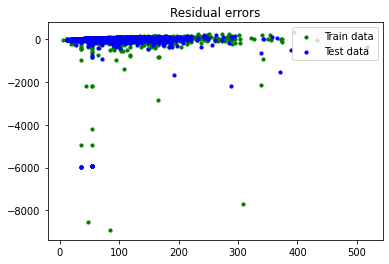

In [333]:
plot_regression_error(linearRegressionNumerical, trainX, trainY, testX, testY)

### 8.4 Regression with all the features

In [334]:
trainX, testX, trainY, testY = get_train_test(
    dfPricesListingTypes.loc[:, dfPricesListingTypes.columns != 'price'],
    dfPricesListingTypes['price'])

trainX.head()

,accommodates,bathrooms,bedrooms,beds,amenities_nr,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
8497,2,1.0,1.0,1.0,24,1,0,0,0,0,0,0,1
16260,2,1.0,1.0,1.0,11,0,1,0,0,0,0,0,1
12788,6,1.0,2.0,2.0,21,1,0,0,0,0,0,0,1
4033,1,1.0,1.0,1.0,18,0,1,0,0,0,0,0,1
10226,2,1.0,1.0,1.0,21,0,1,0,0,0,0,0,1


In [335]:
linearRegression = linear_model.LinearRegression()
linearRegression.fit(trainX, trainY)

LinearRegression()

In [336]:
print('Coefficients:', linearRegression.coef_)
print('Intercept:', linearRegression.intercept_)
print('Score:', linearRegression.score(testX, testY))

Coefficients: [ 15.92475952  19.27984603  17.24810209  -5.84851274   0.17994145
   7.43897987  -4.65681004  -2.78216982  -1.45738476   0.83298547
 -11.26873237  11.66810574   0.22502592]
Intercept: -11.991632146351265
Score: 0.016593901289338908


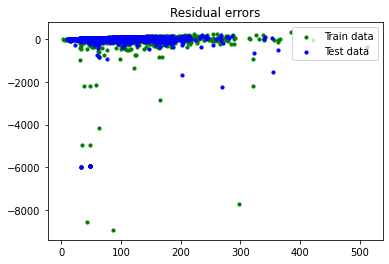

In [337]:
plot_regression_error(linearRegression, trainX, trainY, testX, testY)

### 8.5 Classification with numerical features

The 'price' feature is binned in order to generate categorical values.

In [338]:
dfPricesListingTypes['price'].describe()

count    22472.000000
mean        67.084995
std        220.576041
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [339]:
from sklearn.cluster import KMeans

def kmeans_elbow_method(vectors):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(X=vectors)

        # inertia_ is sum of squared distance of samples to its closest cluster centers.
        wcss.append(kmeans.inertia_)
        print("inertia_", kmeans.inertia_)

    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

inertia_ 1093299313.6602042
inertia_ 130867366.6738121
inertia_ 87963377.19411948
inertia_ 57742227.21795405
inertia_ 38237558.9472009
inertia_ 24327300.33897378
inertia_ 17145688.59288017
inertia_ 13051840.900117492
inertia_ 9473891.328174565
inertia_ 6996373.221199831


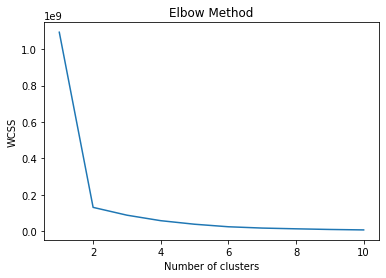

In [340]:
kmeans_elbow_method(dfPricesListingTypes['price'].values.reshape(-1,1))

In [341]:
from sklearn.metrics import silhouette_score
import numpy as np

def kmeans_silhouette(x,range_clusters):
    for i, k in range_clusters :

        # Run the Kmeans algorithm
        km = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)

        km.fit(x)
        labels = km.predict(x)

        print("For n_clusters =", k,
                  "The computed average silhouette_score is :",
              silhouette_score(x, labels, metric='euclidean'))

In [342]:
rangeClusters = enumerate([2,3,4,5])
kmeans_silhouette(dfPricesListingTypes['price'].values.reshape(-1,1), rangeClusters)

For n_clusters = 2 The computed average silhouette_score is : 0.9925142609330438
For n_clusters = 3 The computed average silhouette_score is : 0.948803692077967
For n_clusters = 4 The computed average silhouette_score is : 0.7632528567050937
For n_clusters = 5 The computed average silhouette_score is : 0.791856456457861


The value n_clusters = 3 is chosen because it allows to have a more flexible
classification.

In [343]:
kmeansModelPrice = KMeans(n_clusters=3, max_iter=1000, random_state=42, n_init=50)
kmeansModelPrice.fit(dfPricesListingTypes['price'].values.reshape(-1,1))

KMeans(max_iter=1000, n_clusters=3, n_init=50, random_state=42)

In [344]:
kmeansModelPrice.cluster_centers_

array([[  58.54395433],
       [6147.69230769],
       [1403.2       ]])

In [345]:
mediumClusterIndex = 0
highClusterIndex = 2

In [348]:
dfPricesNumericalListingTypes['price_cluster'] = kmeansModelPrice.predict(
    dfPricesNumericalListingTypes['price'].values.reshape(-1,1))

dfPricesNumericalListingTypes['price_cluster'] = \
    dfPricesNumericalListingTypes['price_cluster'].apply(
        lambda x: 'medium' if x==mediumClusterIndex else
            'high' if x==highClusterIndex else 'very_high')

dfPricesNumericalListingTypes.head()

d:\utenti\marco\desktop\insubria\laurea magistrale\data mining\airbnb-sentiment\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\utenti\marco\desktop\insubria\laurea magistrale\data mining\airbnb-sentiment\venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,accommodates,bathrooms,bedrooms,beds,price,price_cluster
0,3,1.0,1.0,2.0,60.0,medium
1,2,1.0,1.0,1.0,17.0,medium
2,4,1.0,1.0,2.0,90.0,medium
3,2,1.0,1.0,1.0,26.0,medium
4,2,1.0,1.0,2.0,42.0,medium


In [349]:
dfPricesNumericalListingTypes = dfPricesNumericalListingTypes.drop(columns=['price'])
dfPricesNumericalListingTypes.head()

,accommodates,bathrooms,bedrooms,beds,price_cluster
0,3,1.0,1.0,2.0,medium
1,2,1.0,1.0,1.0,medium
2,4,1.0,1.0,2.0,medium
3,2,1.0,1.0,1.0,medium
4,2,1.0,1.0,2.0,medium


In [351]:
trainX, testX, trainY, testY = get_train_test(dfPricesNumericalListingTypes.iloc[:,:4],
                                              dfPricesNumericalListingTypes['price_cluster'])

trainX.head()

,accommodates,bathrooms,bedrooms,beds
8497,2,1.0,1.0,1.0
16260,2,1.0,1.0,1.0
12788,6,1.0,2.0,2.0
4033,1,1.0,1.0,1.0
10226,2,1.0,1.0,1.0


In [352]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeNumerical = DecisionTreeClassifier()
decisionTreeNumerical.fit(trainX, trainY)

DecisionTreeClassifier()

In [355]:
predictionsNumerical = decisionTreeNumerical.predict(testX)

In [357]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testY, predictionsNumerical))
print(classification_report(testY, predictionsNumerical))

[[   1    8    0]
 [   1 6721    1]
 [   0   10    0]]
              precision    recall  f1-score   support

        high       0.50      0.11      0.18         9
      medium       1.00      1.00      1.00      6723
   very_high       0.00      0.00      0.00        10

    accuracy                           1.00      6742
   macro avg       0.50      0.37      0.39      6742
weighted avg       1.00      1.00      1.00      6742



### 8.6 Classification with all the features

In [347]:
dfPricesListingTypes['price_cluster'] = kmeansModelPrice.predict(
    dfPricesListingTypes['price'].values.reshape(-1,1))

dfPricesListingTypes['price_cluster'] = dfPricesListingTypes['price_cluster'].apply(
    lambda x: 'medium' if x==mediumClusterIndex else
        'high' if x==highClusterIndex else 'very_high')

dfPricesListingTypes.head()

,accommodates,bathrooms,bedrooms,beds,price,amenities_nr,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,price_cluster
0,3,1.0,1.0,2.0,60.0,30,1,0,0,0,0,0,0,1,medium
1,2,1.0,1.0,1.0,17.0,11,0,1,0,0,0,0,0,1,medium
2,4,1.0,1.0,2.0,90.0,20,1,0,0,0,0,0,0,1,medium
3,2,1.0,1.0,1.0,26.0,30,0,1,0,0,0,0,1,0,medium
4,2,1.0,1.0,2.0,42.0,14,0,1,0,0,0,0,0,1,medium
